1.	Create a python function to scrape Yelp data for 50 restaurants close to you. Think about what data you want to scrape aside from the restaurant name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.

Scraping  Restaurants data from Yelp website

The goal of this project is to scrape Yelp website to scrape information of all restaurants listed in Missouri area. At the end of this project, we will get the following data about the restaurant:

Name

No. of Reviews

Rating

Comments

In [1]:
# importing packages
from bs4 import BeautifulSoup
import pandas as pd

from IPython.core.display import clear_output
from random import randint
from requests import get
from time import sleep
from time import time
start_time = time()

from warnings import warn

In [3]:
#Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

#Creating an empty list 
results = []

#Creating function and passing page as the parameter number
def getrestaurants(page):
         #Constructing url 
        url = f'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Maryland%20Heights%2C%20MO&ns=1&start='+str(page)
        #get page with requests
        r = requests.get(url)
           
      # Wait a second  to not over exceed rate
        time.sleep(1.01)
        #Using beautiful soup to parse html data:
        soup = BeautifulSoup(r.text, 'html.parser')
        ## Getting all class names under the below mentioned  class using find_all 
        mains = soup.find_all('div', {'class':"container__09f24__sxa9- hoverable__09f24__3HkY2 margin-t3__09f24__hHZsm margin-b3__09f24__3h89A padding-t3__09f24__1VTAn padding-r3__09f24__11Xv2 padding-b3__09f24__2I83c padding-l3__09f24__1JEx9 border--top__09f24__37VAs border--right__09f24__Z9jGU border--bottom__09f24__3lElq border--left__09f24__akfOa border-color--default__09f24__3Epto"})
#Looping through all mains to get the elements of all tags:
        for main in mains:
            try:            
                name = main.find("a",class_="css-166la90").text
                print("Restaurant name:",name)
                rating = main.find("span",{"class":"display--inline__09f24__nqZ_W border-color--default__09f24__3Epto"}).div.get('aria-label')
                print("Restaurant rating:",rating)
                reviewcount = main.find("span", {"class": "reviewCount__09f24__3GsGY css-e81eai"}).text
                print("Restaurant reviewcount:",reviewcount)
                comment = main.find("p", {"class": "css-e81eai"}).text
                print("Restaurant comment:",comment,'\n')
 #Creating a dictionary           
                rest_dict = {'Name':name,
                           'Rating':rating,
                           'Reviews':reviewcount,
                           'Comments':comment}
                results.append(rest_dict)   #appending the dictionary elements to results list
            except AttributeError as e:
                print(e)
        return results
#Using a for loop to print first 50 restaurants data where 0 is starting page.We are using a for loop
#till 60 as some restaurants were missing the data so we had to do exceptional handling for it.
for x in range(0,60,10):
    getrestaurants(x)
#Creating dataframe    
    df = pd.DataFrame(results)


df

Restaurant name: Loaded Elevated Nachos
Restaurant rating: 4.5 star rating
Restaurant reviewcount: 56
Restaurant comment: “Walked in the door and the staff was so welcoming and nice. We ordered 2 of the shareable platters (4 types of nachos) and literally EVERYTHING was delicious.…” more 

Restaurant name: Salt + Smoke
Restaurant rating: 4 star rating
Restaurant reviewcount: 321
Restaurant comment: “Can't speak for the food. Less than pleasurable experience with the hostess caused many to leave.” more 

Restaurant name: Chuck’s Hot Chicken
Restaurant rating: 4.5 star rating
Restaurant reviewcount: 44
Restaurant comment: “I came in from out of town for meetings, so Yelped for Chicken Restaurants and found this place and we I pulled up I was a little nervous as it is very small,…” more 

Restaurant name: Fratelli’s Ristorante
Restaurant rating: 4.5 star rating
Restaurant reviewcount: 212
Restaurant comment: Live wait time: 0 mins 

Restaurant name: Fire Chicken
Restaurant rating: 4.5 sta

Restaurant name: Dino’s Deli
Restaurant rating: 4.5 star rating
Restaurant reviewcount: 19
Restaurant comment: “I've been here several times during my lunch breaks and I haven't been disappointed yet. Friendly service and good food. Definitely recommend!” more 

Restaurant name: Poké Munch
Restaurant rating: 4.5 star rating
Restaurant reviewcount: 182
Restaurant comment: “I'll admit it. I was skeptical. It's a little funky, and there's no way it could be filling right?

WRONG.

Not only was it filling, it's healthy, it's…” more 

Restaurant name: Thai Kitchen
Restaurant rating: 3.5 star rating
Restaurant reviewcount: 339
Restaurant comment: “The Pad Thai extra spicy is my favorite! I'm a huge spicy person, and this wasn't the hottest I've had but it was so good! Thai takeout nights in helped make…” more 

Restaurant name: Creve Coeur Lakehouse
Restaurant rating: 2.5 star rating
Restaurant reviewcount: 76
Restaurant comment: “We frequently bike Creve Coeur Lake and the surrounding areas

,Name,Rating,Reviews,Comments
0,Loaded Elevated Nachos,4.5 star rating,56,“Walked in the door and the staff was so welco...
1,Salt + Smoke,4 star rating,321,“Can't speak for the food. Less than pleasurab...
2,Chuck’s Hot Chicken,4.5 star rating,44,"“I came in from out of town for meetings, so Y..."
3,Fratelli’s Ristorante,4.5 star rating,212,Live wait time: 0 mins
4,Fire Chicken,4.5 star rating,65,“I love trying out new places and this was no ...
5,Firebirds Wood Fired Grill,3.5 star rating,381,“The service we got today was outstanding and ...
6,O’Fallon Brewery,3.5 star rating,47,"“Again, when I go to a brewery, I'm really onl..."
7,314 Social,5 star rating,1,“This was my second visit to 314 Social and I ...
8,Cobalt Smoke & Sea,4 star rating,113,"“I was a fan of the old ""Woodsmoke/Windowsills..."
9,Syberg’s on Dorsett,3.5 star rating,206,“Had a great time and tasty dinner tonight wit...


In [14]:
#Saving pandas dataframe to csv 
df.to_csv (r'C:\Users\sunny\Desktop\restaurant_dataframe.csv', index = False, header=True)

2.	Create an API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

Please see my rest.py file for code 

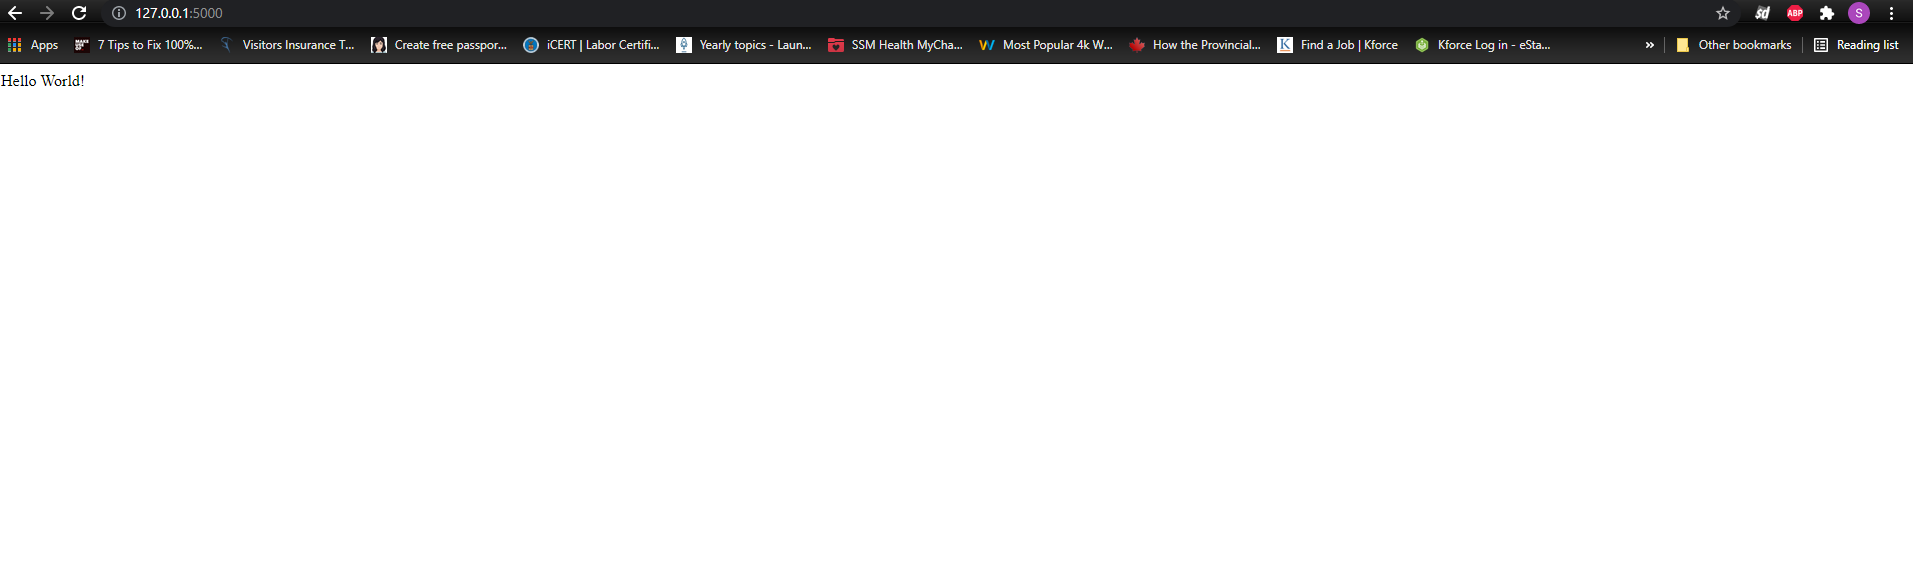

3.	What is web scraping? Why is it helpful? Why is it sometimes in a legal grey area?

Web Scraping is the technique of automatically extracting data from websites using software/script. 

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data 
from websites. 
The web scraping software may directly access the World Wide Web using the Hypertext Transfer
Protocol or a web browser. 
While web scraping can be done manually by a software user, the term typically refers to automated processes
implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied 
from the web, typically into a central local database or spreadsheet, for later retrieval or
analysis.

Web scraping a web page involves fetching it and extracting from it. 
Fetching is the downloading of a page (which a browser does when a user views a page). 
Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. 
Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, 
its data copied into a spreadsheet or loaded into a database. Web scrapers typically take something out of a 
page, to make use of it for another purpose somewhere else. An example would be to find and copy names and
telephone numbers, or companies and their URLs, or e-mail addresses to a list (contact scraping).

Helpful:
Web scraping can help us extract any kind of data that we want.It helps in retrieving, analyzing and using the data the way we want. So web scraping simplifies the process of extracting data, speeds it up by automating it and creates easy access to the scrapped data by providing it in a CSV format.

Legal area :
The real question here should be regarding how you plan to use the data which you have
extracted from a website (either manually or via using software). Because the data displayed 
by most website is for public consumption. It is totally legal to copy this information to a 
file in your computer. But it is regarding how you plan to use this data that you should be 
careful about. If the data is downloaded for your personal use and analysis, then it is
absolutely ethical. But in case you are planning to use it as your own, in your website, 
in a way which is completely against the interest of the original owner of the data, without 
attributing the original owner, then it is unethical, illegal.   